# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 
# –ú–∞—Ç–µ–º–∞—Ç–∏–∫–∞ ‚Äî –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 7
# –ê.&#8201;–î. –ï–≥–æ—Ä–æ–≤<h1/>

In [51]:
import numpy as np
import scipy as sp 

import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from collections import Counter

import datetime
from dateutil.parser import parse

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib inline

## –î–∞—Ç–∞—Å–µ—Ç –∏–∑ –ø—Ä–æ—à–ª–æ–≥–æ –î–ó

–î–∞–Ω–Ω—ã–µ –≤–∑—è—Ç—ã –æ—Ç—Å—é–¥–∞: https://www.kaggle.com/datasets/kallefischer/app-user-dataset

In [2]:
df_users = pd.read_csv("./user_demographics.csv")
df_users["uid"] = df_users["uid"].agg(func=lambda x: int(x))
df_users

uid              reg_date device gender country  age
0     54030035  2017-06-29T00:00:00Z    and      M     USA   19
1     72574201  2018-03-05T00:00:00Z    iOS      F     TUR   22
2     64187558  2016-02-07T00:00:00Z    iOS      M     USA   16
3     92513925  2017-05-25T00:00:00Z    and      M     BRA   41
4     99231338  2017-03-26T00:00:00Z    iOS      M     FRA   59
...        ...                   ...    ...    ...     ...  ...
9995  43138741  2016-11-23T00:00:00Z    and      M     BRA   16
9996  30326568  2016-08-21T00:00:00Z    and      M     BRA   15
9997  92384369  2015-08-20T00:00:00Z    and      F     DEU   33
9998  98809962  2017-04-08T00:00:00Z    iOS      F     FRA   32
9999  82078268  2018-02-23T00:00:00Z    and      F     CAN   31

[10000 rows x 6 columns]

–°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Ñ–µ–π–∫–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –æ –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º –≤ —Å–µ—Ä–≤–∏—Å–µ. 

In [3]:
# –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ —Å–¥–µ–ª–∞–µ–º —Ç–∞–∫, —á—Ç–æ —á–µ–º –º–µ–Ω—å—à–µ –≤–æ–∑—Ä–∞—Å—Ç, —Ç–µ–º –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –æ–Ω –ø—Ä–æ–≤–æ–¥–∏—Ç –≤ —Å–µ—Ä–≤–∏—Å–µ
df_users["time_spent"] = df_users["age"].values.max() - (df_users["age"] - df_users["age"].values.mean())
df_users["time_spent"] = df_users["time_spent"].agg(func=lambda x: x * abs(np.random.normal(2, 1.2)))

# –ü–æ–ø—Ä–∞–≤–∫–∞ –Ω–∞ –≤—Ä–µ–º—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å—Ç—Ä–∞–Ω—ã
mult = dict(zip(df_users["country"].unique(), [1.3, 0.9, 1., 1.2, 1.03, 1.05]))
df_users["time_spent"] = df_users["time_spent"] * df_users["country"].apply(func=lambda x: mult[x])

# –ü–æ–ø—Ä–∞–≤–∫–∞ –Ω–∞ –≤—Ä–µ–º—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å —Å–µ—Ä–≤–∏—Å–æ–º –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞
mult = dict(zip(["M", "F"], [1.2, 1.]))
df_users["time_spent"] = df_users["time_spent"] * df_users["gender"].apply(func=lambda x: mult[x])

df_users

uid              reg_date device gender country  age  time_spent
0     54030035  2017-06-29T00:00:00Z    and      M     USA   19  265.462503
1     72574201  2018-03-05T00:00:00Z    iOS      F     TUR   22  167.401951
2     64187558  2016-02-07T00:00:00Z    iOS      M     USA   16  233.624237
3     92513925  2017-05-25T00:00:00Z    and      M     BRA   41    9.277666
4     99231338  2017-03-26T00:00:00Z    iOS      M     FRA   59  149.125906
...        ...                   ...    ...    ...     ...  ...         ...
9995  43138741  2016-11-23T00:00:00Z    and      M     BRA   16  157.021148
9996  30326568  2016-08-21T00:00:00Z    and      M     BRA   15  398.574667
9997  92384369  2015-08-20T00:00:00Z    and      F     DEU   33  159.732893
9998  98809962  2017-04-08T00:00:00Z    iOS      F     FRA   32  157.832129
9999  82078268  2018-02-23T00:00:00Z    and      F     CAN   31  172.772236

[10000 rows x 7 columns]

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

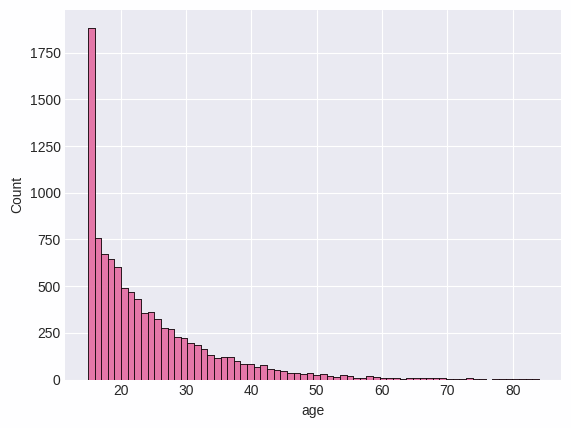

In [4]:
sns.histplot(df_users["age"])
sns.histplot(df_users["age"])
plt.show()

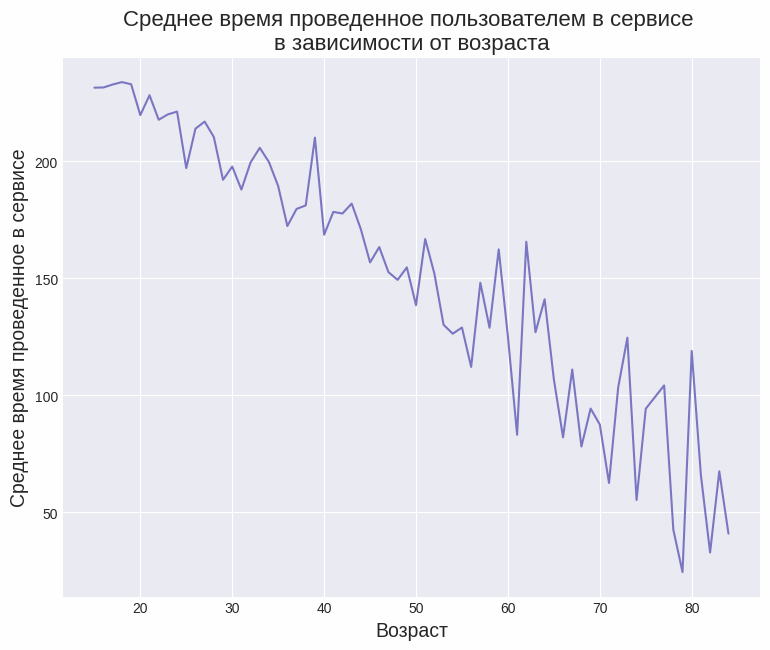

In [5]:
plt.figure(figsize=(9,7))
plt.plot(
    sorted(df_users["age"].unique()),
    df_users.groupby(by="age").agg({"time_spent": "mean"})
)
plt.title("C—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º –≤ —Å–µ—Ä–≤–∏—Å–µ \n–≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–æ–∑—Ä–∞—Å—Ç–∞", fontsize=16)
plt.xlabel("–í–æ–∑—Ä–∞—Å—Ç", fontsize=14)
plt.ylabel("–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –≤ —Å–µ—Ä–≤–∏—Å–µ", fontsize=14)
plt.show()

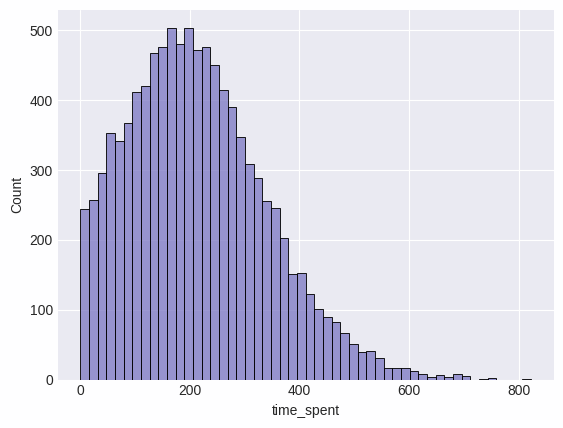

In [11]:
sns.histplot(df_users["time_spent"])
plt.show()

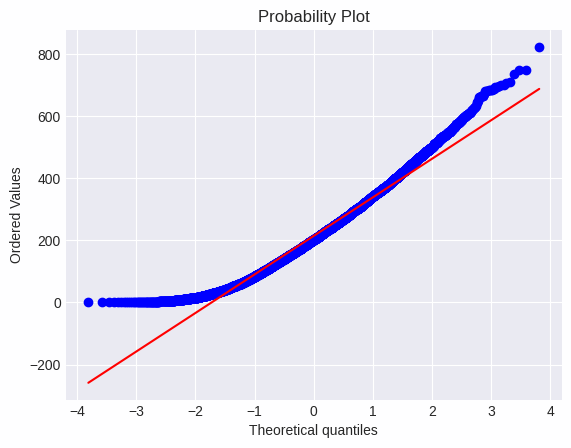

In [91]:
sp.stats.probplot(df_users["time_spent"], dist="norm", plot=plt)
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ —Å—Ç—Ä–∞–Ω—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –≤—ã–±–æ—Ä–∫–µ:

In [6]:
df_users["country"].unique()

array(['USA', 'TUR', 'BRA', 'FRA', 'DEU', 'CAN'], dtype=object)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Å—Ç—Ä–∞–Ω:

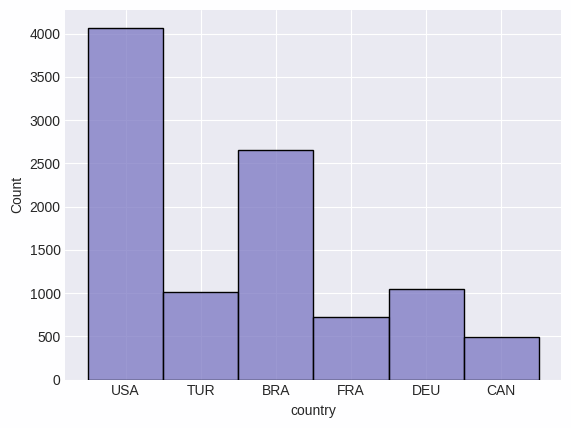

In [7]:
sns.histplot(df_users["country"])
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –≤ —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π –≥–æ–¥

In [8]:
print(Counter(df_users["reg_date"].apply(lambda x: parse(x).year)))
print(min(df_users["reg_date"].apply(lambda x: parse(x))))
print(max(df_users["reg_date"].apply(lambda x: parse(x))))


Counter({2017: 4916, 2018: 2482, 2016: 2027, 2015: 575})
2015-01-16 00:00:00+00:00
2018-03-18 00:00:00+00:00


## –ó–∞–¥–∞–Ω–∏–µ 1

–°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –¥–≤—É—Ö–≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã –∫–∞—Å–∞—Ç–µ–ª—å–Ω–æ –º–µ–¥–∏–∞–Ω –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ –∏ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ —Å–ª—É—á–∞—è. –ï—Å–ª–∏ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –Ω–µ—Ç - —Å–æ–∑–¥–∞–π—Ç–µ –µ–≥–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ. –ò—Ç–æ–≥–æ 4 –≥–∏–ø–æ—Ç–µ–∑—ã (4 –ø—É–Ω–∫—Ç–∞).

### –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–≤—É–≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã: 

#### –°–≤—è–∑–Ω—ã–µ: 
1. –ú–µ–¥–∏–∞–Ω—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ª—é–¥–µ–π –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.
2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.

#### –ù–µ—Å–≤—è–∑–Ω—ã–µ:
3. –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–µ OS —É –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã.
4. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ, –¥–ª—è –ë—Ä–∞–∑–∏–ª–∏–∏ –∏ –°–®–ê —Å–æ–≤–ø–∞–¥–∞—é —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ —Å–º–µ—â–µ–Ω–∏—è.

## –ó–∞–¥–∞–Ω–∏–µ 2

### –ì–∏–ø–æ—Ç–µ–∑–∞ 1 (—Å–≤—è–∑–Ω–∞—è)

**–ú–µ–¥–∏–∞–Ω—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ª—é–¥–µ–π –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç (–≤–æ–∑—Ä–∞—Å—Ç &mdash; –¥–∏—Å–∫—Ä–µ—Ç–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞).**

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–ª—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã:

In [27]:
df_users_2017 = df_users[df_users["reg_date"].apply(lambda x: parse(x).year) == 2017].sort_values(by="reg_date")
df_users_2017

uid              reg_date device gender country  age  time_spent
5929  24248294  2017-01-01T00:00:00Z    and      M     BRA   18  316.556151
2072  53992590  2017-01-01T00:00:00Z    iOS      F     USA   50  136.258056
3187  53830217  2017-01-01T00:00:00Z    and      M     USA   38  310.964016
8978  45991562  2017-01-01T00:00:00Z    and      M     BRA   19  359.785351
5811  29020754  2017-01-01T00:00:00Z    iOS      F     TUR   18   98.463094
...        ...                   ...    ...    ...     ...  ...         ...
6707  20642238  2017-12-31T00:00:00Z    and      M     USA   36  138.388991
9904  73324422  2017-12-31T00:00:00Z    iOS      F     DEU   36   64.572747
2549  38880120  2017-12-31T00:00:00Z    iOS      M     TUR   23  284.528894
7139  29843758  2017-12-31T00:00:00Z    iOS      F     USA   22   94.443535
3279  46074245  2017-12-31T00:00:00Z    and      F     TUR   15  413.955642

[4916 rows x 7 columns]

In [26]:
df_users_2018 = df_users[df_users["reg_date"].apply(lambda x: parse(x).year) == 2018].sort_values(by="reg_date")
df_users_2018

uid              reg_date device gender country  age  time_spent
3163  14137740  2018-01-01T00:00:00Z    and      F     BRA   35  161.785274
6237  53460798  2018-01-01T00:00:00Z    iOS      M     USA   20   41.165692
9583  22329841  2018-01-01T00:00:00Z    and      F     USA   19  560.250877
3854  71379039  2018-01-01T00:00:00Z    iOS      F     BRA   25  242.015429
2006  52029755  2018-01-01T00:00:00Z    and      M     DEU   24  239.329388
...        ...                   ...    ...    ...     ...  ...         ...
8723  88749692  2018-03-18T00:00:00Z    and      F     USA   43  264.062945
8232  26545487  2018-03-18T00:00:00Z    and      F     USA   22  398.187372
908   86080479  2018-03-18T00:00:00Z    and      F     BRA   18  185.141637
2871  44154700  2018-03-18T00:00:00Z    and      F     USA   16  449.079127
2096  17411217  2018-03-18T00:00:00Z    iOS      M     USA   16  237.934286

[2482 rows x 7 columns]

–ü—Ä–∏–º–µ–Ω–∏–º –¥–ª—è –≥–∏–ø–æ—Ç–µ–∑—ã 1 –∫—Ä–∏—Ç–µ—Ä–∏–π –£–∏–ª–∫–æ–∫—Å–æ–Ω–∞ (–¥–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π, –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–µ–¥–∏–∞–Ω —Å–≤—è–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫).

–¢–∞–∫ –∫–∞–∫ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞–ª–æ–≥–∞–µ—Ç—Å—è –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ, —á—Ç–æ –∏—Ö —Ä–∞–∑–º–µ—Ä –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º, —Ç–æ —É—Ä–µ–∂–µ–º –≤—ã–±–æ—Ä–∫—É –∑–∞ 2017 –≥–æ–¥: –≤–æ–∑—å–º–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2482 –∑–∞–ø–∏—Å–∏:

In [28]:
df_users_2017 = df_users_2017[-2482:]
df_users_2017

uid              reg_date device gender country  age  time_spent
760   62331433  2017-08-11T00:00:00Z    and      M     BRA   26   82.709320
5946  15548925  2017-08-11T00:00:00Z    and      F     TUR   26   82.506648
373   42220050  2017-08-11T00:00:00Z    iOS      F     BRA   20   67.020354
973   69707081  2017-08-11T00:00:00Z    and      M     USA   38  143.212130
4588  66631587  2017-08-11T00:00:00Z    iOS      F     USA   18  383.516407
...        ...                   ...    ...    ...     ...  ...         ...
6707  20642238  2017-12-31T00:00:00Z    and      M     USA   36  138.388991
9904  73324422  2017-12-31T00:00:00Z    iOS      F     DEU   36   64.572747
2549  38880120  2017-12-31T00:00:00Z    iOS      M     TUR   23  284.528894
7139  29843758  2017-12-31T00:00:00Z    iOS      F     USA   22   94.443535
3279  46074245  2017-12-31T00:00:00Z    and      F     TUR   15  413.955642

[2482 rows x 7 columns]

–ü—Ä–æ–≤–µ–¥–µ–º —Ç–µ—Å—Ç –£–∏–ª–∫–æ–∫—Å–æ–Ω–∞:

In [31]:
sp.stats.wilcoxon(df_users_2017["age"], df_users_2018["age"], alternative="two-sided")

WilcoxonResult(statistic=1382129.0, pvalue=0.5182148159242556)

$pvalue > 0.05$, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≥–∏–ø–æ—Ç–µ–∑—É 1 –ø—Ä–∏–Ω–∏–º–∞–µ–º.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2 (—Å–≤—è–∑–Ω–∞—è)
**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.**

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–µ—Å—Ç–æ–º –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ (–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç), —Ç.–∫. –º—ã –ø—ã—Ç–∞–µ–º—Å—è –ø–æ–Ω—è—Ç—å –∏–∑ –æ–¥–Ω–æ –ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏—à–ª–∏ –¥–∞–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏.

In [32]:
sp.stats.ks_2samp(df_users_2017["time_spent"], df_users_2018["time_spent"], alternative="two-sided")

KstestResult(statistic=0.023771152296535054, pvalue=0.48472904507266695, statistic_location=318.65452559272114, statistic_sign=-1)

$pvalue > 0.05$, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≥–∏–ø–æ—Ç–µ–∑—É 2 –ø—Ä–∏–Ω–∏–º–∞–µ–º.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 3 (–Ω–µ—Å–≤—è–∑–Ω–∞—è)
**–ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–µ OS —É –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã.**

–ü—Ä–æ–≤–µ—Ä—è—Ç—å –¥–∞–Ω–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É –±—É–¥–µ–º —Ç–µ—Å—Ç —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç –Ω–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ —Ç–∞–±–ª–∏—Ü–µ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω, —Ç. –∫. –∏—Å—Å–ª–µ–¥—É–µ–º—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–µ –∏  –≥–∏–ø–æ—Ç–µ–∑–∞ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π. –°–æ—Å—Ç–∞–≤–∏–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –¥–≤—É—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: 

In [36]:
# –°–æ—Å—Ç–∞–≤–∏–º —Ç–∞–±–ª–∏—Ü—É
#                   iOS             and
#    Male   count(M & iOS)  count(M & and)
#  Female   count(F & iOS)  count(F & and)
#

MF_OS_data = [
    [
        df_users[(df_users["gender"] == "M") & (df_users["device"] == "iOS")].shape[0],
        df_users[(df_users["gender"] == "M") & (df_users["device"] == "and")].shape[0],
    ],
    [
        df_users[(df_users["gender"] == "F") & (df_users["device"] == "iOS")].shape[0],
        df_users[(df_users["gender"] == "F") & (df_users["device"] == "and")].shape[0],
    ]
]

pd.DataFrame(MF_OS_data, columns=["iOS", "and"], index=["M", "F"])

iOS   and
M  2030  2770
F  2160  3040

In [37]:
sp.stats.chi2_contingency(MF_OS_data)

Chi2ContingencyResult(statistic=0.5511469940187264, pvalue=0.4578494114061443, dof=1, expected_freq=array([[2011.2, 2788.8],
       [2178.8, 3021.2]]))

$pvalue > 0.05$, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≥–∏–ø–æ—Ç–µ–∑–∞ 3 –≤–µ—Ä–Ω–∞, —Ç.–µ. –≤—ã–±–æ—Ä–∫–∏ –≤–∑—è—Ç—ã –∏–∑ –æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.


### –ì–∏–ø–æ—Ç–µ–∑–∞ 4 (–Ω–µ—Å–≤—è–∑–Ω–∞—è)
**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ, –¥–ª—è –ë—Ä–∞–∑–∏–ª–∏–∏ –∏ –°–®–ê —Å–æ–≤–ø–∞–¥–∞—é —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ —Å–º–µ—â–µ–Ω–∏—è.**

–î–ª—è –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–µ—Å—Ç–æ–º –£–∏–ª–∫–æ–∫—Å–æ–Ω–∞-–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, —Ç. –∫. —Ä–µ—á—å –∏–¥–µ—Ç –æ —Ñ–æ—Ä–º–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, —Ç. –µ. –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è —Å–¥–≤–∏–≥–æ–º.

–ü–æ–ª—É—á–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã:

In [38]:
df_users_BRA = df_users[df_users["country"] == "BRA"]
df_users_BRA

uid              reg_date device gender country  age  time_spent
3     92513925  2017-05-25T00:00:00Z    and      M     BRA   41    9.277666
6     16377492  2016-10-16T00:00:00Z    and      M     BRA   20  150.781800
9     40461463  2017-07-16T00:00:00Z    and      M     BRA   32  266.291532
14    74263197  2017-06-22T00:00:00Z    and      F     BRA   24  154.888886
17    73480791  2017-08-20T00:00:00Z    iOS      M     BRA   45  299.695988
...        ...                   ...    ...    ...     ...  ...         ...
9987  65979851  2018-02-28T00:00:00Z    iOS      F     BRA   15  234.459138
9988  17231199  2017-11-10T00:00:00Z    and      F     BRA   21  133.866317
9990  67294307  2017-06-07T00:00:00Z    iOS      M     BRA   40  247.724978
9995  43138741  2016-11-23T00:00:00Z    and      M     BRA   16  157.021148
9996  30326568  2016-08-21T00:00:00Z    and      M     BRA   15  398.574667

[2652 rows x 7 columns]

In [39]:
df_users_USA = df_users[df_users["country"] == "USA"]
df_users_USA

uid              reg_date device gender country  age  time_spent
0     54030035  2017-06-29T00:00:00Z    and      M     USA   19  265.462503
2     64187558  2016-02-07T00:00:00Z    iOS      M     USA   16  233.624237
5     64229733  2017-05-17T00:00:00Z    and      F     USA   17  470.441450
7     36350096  2017-04-07T00:00:00Z    and      M     USA   23  176.437304
8     98955454  2016-08-11T00:00:00Z    and      M     USA   22   18.900489
...        ...                   ...    ...    ...     ...  ...         ...
9982  91337513  2017-03-19T00:00:00Z    and      F     USA   18  207.898571
9983  32143131  2017-11-15T00:00:00Z    iOS      M     USA   24  315.521736
9991  59059766  2016-03-03T00:00:00Z    iOS      M     USA   23  400.821906
9993  12936762  2015-09-03T00:00:00Z    and      F     USA   32  164.153920
9994  51143252  2017-12-29T00:00:00Z    iOS      F     USA   32   89.766498

[4071 rows x 7 columns]

–ü—Ä–æ–≤–µ–¥–µ–º —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏:

In [ ]:
sp.stats.mannwhitneyu(df_users_USA["time_spent"], df_users_BRA["time_spent"], alternative="two-sided")

MannwhitneyuResult(statistic=6677841.0, pvalue=7.978179021617508e-61)

$pvalue < 0.05$, –∑–Ω–∞—á–∏—Ç, –ª–∏–±–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω—ã, –ª–∏–±–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–¥–≤–∏–≥.

–ü–æ—Å—Ç—Ä–æ–∏–º kdeplot

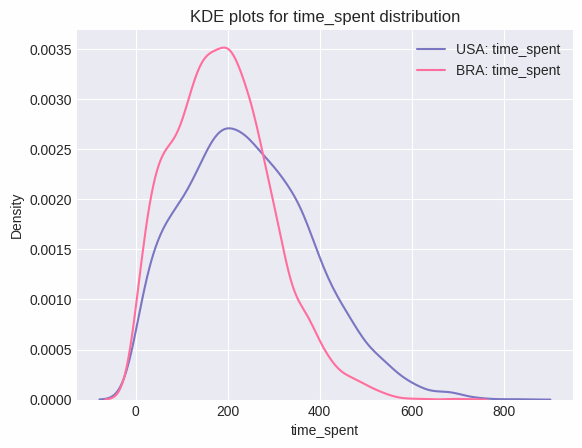

In [40]:
sns.kdeplot(df_users_USA["time_spent"], label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ —Ñ–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–ª—é—Å-–º–∏–Ω—É—Å –ø–æ—Ö–æ–∂–∏: –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–µ —Ö–≤–æ—Å—Ç—ã –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ –ø–æ –°–®–ê, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –≤—ã–∑–≤–∞–Ω—ã –µ–µ —Ä–∞–∑–º–µ—Ä–æ–º.
–í—ã—á–∏—Å–ª–∏–º —Å–º–µ—â–µ–Ω–∏–µ –æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–æ–π:

In [48]:
shift = np.percentile(df_users_USA["time_spent"], q=50) - np.percentile(df_users_BRA["time_spent"], q=50)
shift

52.071360942192484

–ü—Ä–æ–≤–µ–¥–µ–º —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –µ—â–µ —Ä–∞–∑, –Ω–æ —É–∂–µ —Å–æ —Å–º–µ—â–µ–Ω–∏–µ–º:

In [49]:
sp.stats.mannwhitneyu(df_users_USA["time_spent"] - shift, df_users_BRA["time_spent"], alternative="two-sided")

MannwhitneyuResult(statistic=5414815.0, pvalue=0.8303078050287779)

$pvalue > 0.05$, –∞, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≥–∏–ø–æ—Ç–µ–∑–∞ 4 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞. –ü–æ—Å—Ç—Ä–æ–∏–º kdeplot –¥–ª—è —Å–º–µ—â–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:

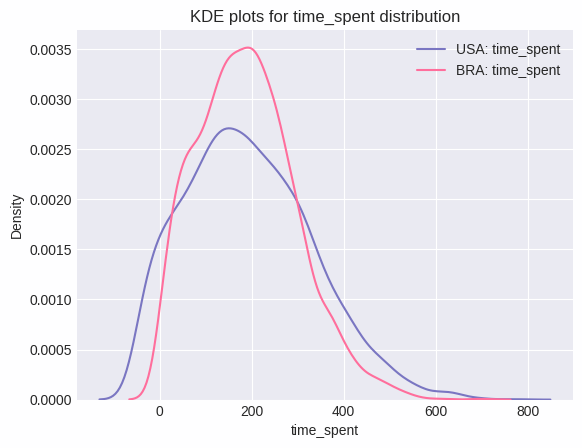

In [44]:
sns.kdeplot(df_users_USA["time_spent"] - shift, label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

–•–æ—Ç—å –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –∏ –≤–∏–∑—É–∞–ª—å–Ω–æ –ø–æ—Ö–æ–∂–∏, –≤–æ–∑–º–æ–∂–Ω–æ, —á—Ç–æ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ —Ç–µ—Å—Ç –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –æ–±–µ –≤—ã–±–æ—Ä–∫–∏ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –æ–¥–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é, —á–µ—Ä–µ–∑ —Ç–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 

In [209]:
sp.stats.ks_2samp(df_users_USA["time_spent"] - shift, df_users_BRA["time_spent"], alternative="two-sided")

KstestResult(statistic=0.08916783651275827, pvalue=1.4599464385921613e-11, statistic_location=26.305236530802176, statistic_sign=1)

–ü–æ –¥–∞–Ω–Ω–æ–º—É –∫—Ä–∏—Ç–µ—Ä–∏—é, –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ç–æ–∏—Ç –æ—Ç–≤–µ—Ä–≥—É—Ç—å: $pvalue < 0.05$. 

–•–æ—Ç—è, –µ—Å–ª–∏ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ –∑–¥—Ä–∞–≤—ã–π —Å–º—ã—Å–ª, –≤—Ä—è–¥–ª–∏ –º–æ–∂–Ω–æ —Å—á–µ—Å—Ç—å, —á—Ç–æ –∑–∞–∫–æ–Ω, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –ª—é–¥–∏ –ø—Ä–æ–≤–æ–¥—è—Ç –≤—Ä–µ–º—è –≤ —Å–µ—Ä–≤–∏—Å–µ, –±—É–¥–µ—Ç –æ—Ç–ª–∏—á–µ–Ω –≤ –∫–∞–∫–æ–π-–ª–∏–±–æ —Ç–æ—á–∫–µ –º–∏—Ä–∞: –≤—Å–µ–≥–¥–∞ –±—É–¥—É—Ç –ª—é–¥–∏ –∫—Ç–æ –ø—Ä–æ–≤–æ–¥–∏—Ç –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ –º–µ–Ω—å—à–µ –∏–ª–∏ –±–æ–ª—å—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, –∞ —Ç–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã (–æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é—â–∏–µ\—Å–¥–µ—Ä–∂–∏–≤–∞—é—â–∏–µ) –∫–∞–∫: –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞ –∏–ª–∏ –∑–∞–∫–æ–Ω—ã –¥–µ–π—Å—Ç–≤—É—é—â–∏–µ –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ —Å—Ç—Ä–∞–Ω—ã, –≤ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π –º–µ—Ä–µ, –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—é—â–∏–µ –¥–æ—Å—Ç—É–ø –∫ —Ä–µ—Å—É—Ä—Å—É, –∫–∞–∫ —Ä–∞–∑ –∏ —Å–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –Ω–∞ –≤–∏–¥–∏–º–æ–π —Ä–∞–∑–Ω–∏—Ü–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.

### –ë—É—Ç—Å—Ç—Ä–∞–ø

#### 1. –ú–µ–¥–∏–∞–Ω—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ª—é–¥–µ–π –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.


In [207]:
X_median = []
Y_median = []
for _ in range(1000):
    X_median.append(
        np.median(np.random.choice(df_users_2017["age"], size=df_users_2017.shape[0], replace=True))
    )
    Y_median.append(
        np.median(np.random.choice(df_users_2018["age"], size=df_users_2018.shape[0], replace=True))
    )

print(np.mean(X_median), np.percentile(X_median, q=[2.5, 97.5]))
print(np.mean(Y_median), np.percentile(Y_median, q=[2.5, 97.5]))
print(f"abs_err = {np.fabs(np.mean(X_median) - np.mean(Y_median))}")
print(f"rel_err = {np.fabs(np.mean(X_median) - np.mean(Y_median)) / np.mean(X_median)}")

21.1735 [21. 22.]
21.299 [21. 22.]
abs_err = 0.12549999999999883
rel_err = 0.005927220346187396


–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –º–µ–Ω—å—à–µ 1%, –¥–∞, –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Ç–∞–∫ —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑—É 1 –ø—Ä–∏–Ω–∏–º–∞–µ–º.

#### 2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.

In [195]:
X_mean = []
X_var = []
X_cm_3 = []  # central moment 3-d order
X_cm_4 = []  # central moment 4-th order

Y_mean = []
Y_var = []
Y_cm_3 = []  # central moment 3-d order
Y_cm_4 = []  # central moment 4-th order


for _ in range(1000):
    X = np.random.choice(df_users_2017["time_spent"], size=df_users_2017.shape[0], replace=True)
    Y = np.random.choice(df_users_2018["time_spent"], size=df_users_2018.shape[0], replace=True)

    X_mean.append(np.mean(X))
    X_var.append(np.var(X))
    X_cm_3.append(sp.stats.moment(X, moment=3))
    X_cm_4.append(sp.stats.moment(X, moment=4))

    Y_mean.append(np.mean(Y))
    Y_var.append(np.var(Y))
    Y_cm_3.append(sp.stats.moment(Y, moment=3))
    Y_cm_4.append(sp.stats.moment(Y, moment=4))

X_minus_Y_mean = np.array(X_mean) - np.array(Y_mean)
X_minus_Y_var = np.array(X_var) - np.array(Y_var)
X_minus_Y_cm_3 = np.array(X_cm_3) - np.array(Y_cm_3)
X_minus_Y_cm_4 = np.array(X_cm_4) - np.array(Y_cm_4)

X_mean = np.mean(X_mean)
X_var = np.mean(X_var)
X_cm_3 = np.mean(X_cm_3)
X_cm_4 = np.mean(X_cm_4)

Y_mean = np.mean(Y_mean)
Y_var = np.mean(Y_var)
Y_cm_3 = np.mean(Y_cm_3)
Y_cm_4 = np.mean(Y_cm_4)

df_time_17_18 = pd.DataFrame(
    [
        [X_mean, X_var, X_cm_3, X_cm_4],
        [Y_mean, Y_var, Y_cm_3, Y_cm_4],
        [
            X_minus_Y_mean.mean(),
            X_minus_Y_var.mean(),
            X_minus_Y_cm_3.mean(),
            X_minus_Y_cm_4.mean(),
        ],
        [
            X_minus_Y_mean.mean() / X_mean,
            X_minus_Y_var.mean() / X_var,
            X_minus_Y_cm_3.mean() / X_cm_3,
            X_minus_Y_cm_4.mean() / X_cm_4,
        ],
    ],
    columns=["mean", "var", "cm_3", "cm_4"],
    index=["2017", "2018", "abs_err", "rel_err"],
)
df_time_17_18

mean           var          cm_3          cm_4
2017     216.833237  16169.496514  1.139036e+06  7.948139e+08
2018     215.815730  15944.906291  1.209837e+06  8.310220e+08
abs_err    1.017507    224.590223 -7.080040e+04 -3.620804e+07
rel_err    0.004693      0.013890 -6.215815e-02 -4.555537e-02

##### –ü–æ—è—Å–Ω–µ–Ω–∏–µ –∫ —Ç–∞–±–ª–∏—Ü–µ:  
–ó–Ω–∞—á–µ–Ω–∏—è 2017 –≥–æ–¥–∞ –±—ã–ª–∏ –ø—Ä–∏–Ω—è—Ç—ã –∑–∞ —ç—Ç–∞–ª–æ–Ω–Ω—ã–µ: –ø–æ –Ω–∏–º –≤—ã—á–∏—Å–ª–∏–ª–∏ –∞–±—Å–æ–ª—é—Ç–Ω—É—é –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –æ—à–∏–±–∫–∏.

##### –í—ã–≤–æ–¥
–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –¥–ª—è –≤—Å–µ—Ö –º–æ–º–µ–Ω—Ç–æ–≤ 1 –∏ 2 –ø–æ—Ä—è–¥–∫–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –º–µ–Ω—å—à–µ 1.5%, –∞ –¥–ª—è 3 –∏ 4 –º–µ–Ω—å—à–µ 6%, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –º–æ–∂–Ω–æ –∑–∞—è–≤–∏—Ç—å –æ —Å—Ö–æ–∂–µ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.

#### 3. –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–µ OS —É –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã.

–ü—Ä–æ–≤–µ–¥–µ–º –±—É—Ç—Å—Ç—Ä–∞–ø –ø–æ –≤—ã–±–æ—Ä–∫–∞–º –≤—ã–±–æ—Ä–∞ OS –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞. 
–ë—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å iOS –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å and —Å—Ä–µ–¥–∏ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω.

In [198]:
df_M_OS = df_users[df_users["gender"] == "M"][["gender", "device"]]
df_F_OS = df_users[df_users["gender"] == "F"][["gender", "device"]]

M_rel_iOS_to_and = []
F_rel_iOS_to_and = []
for _ in range(1000):
    M_OS = np.random.choice(df_M_OS["device"].values, size=df_M_OS.shape[0], replace=True)
    F_OS = np.random.choice(df_F_OS["device"].values, size=df_F_OS.shape[0], replace=True)

    tmp_cnt = Counter(M_OS)
    M_rel_iOS_to_and.append(
        tmp_cnt["iOS"] / tmp_cnt["and"]
    )

    tmp_cnt = Counter(F_OS)
    F_rel_iOS_to_and.append(
        tmp_cnt["iOS"] / tmp_cnt["and"]
    )

df_mean_rel_iOS_to_and = pd.DataFrame(
    [[np.mean(M_rel_iOS_to_and), np.mean(F_rel_iOS_to_and)]],
    columns=["M", "F"],
    index=["mean_rel_iOS_to_and"]
)
df_mean_rel_iOS_to_and


M         F
mean_rel_iOS_to_and  0.732833  0.710193

–í—ã—á–∏—Å–ª–∏–º –∞–±—Å–æ–ª—é—Ç–Ω—É—é –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –æ—à–∏–±–∫–∏ (Male &mdash; —ç—Ç–∞–ª–æ–Ω):

In [199]:
df_mean_rel_iOS_to_and["abs_err"] = np.fabs(df_mean_rel_iOS_to_and["M"] - df_mean_rel_iOS_to_and["F"])
df_mean_rel_iOS_to_and["rel_err"] = df_mean_rel_iOS_to_and["abs_err"] / df_mean_rel_iOS_to_and["M"]
df_mean_rel_iOS_to_and

M         F  abs_err   rel_err
mean_rel_iOS_to_and  0.732833  0.710193  0.02264  0.030894

–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ —Å–æ—Å—Ç–∞–≤–∏–ª–∞ –º–µ–Ω—å—à–µ 3.5%, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥ –æ–± –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.

#### 4. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ, –¥–ª—è –ë—Ä–∞–∑–∏–ª–∏–∏ –∏ –°–®–ê —Å–æ–≤–ø–∞–¥–∞—é —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ —Å–º–µ—â–µ–Ω–∏—è.

In [205]:
# shift = np.percentile(df_users_USA["time_spent"], q=50) - np.percentile(df_users_BRA["time_spent"], q=50)
shift = df_users_USA["time_spent"].mean() - df_users_BRA["time_spent"].mean()

In [206]:
X_mean = []
X_var = []
X_cm_3 = []  # central moment 3-d order
X_cm_4 = []  # central moment 4-th order

Y_mean = []
Y_var = []
Y_cm_3 = []  # central moment 3-d order
Y_cm_4 = []  # central moment 4-th order


for _ in range(1000):
    X = np.random.choice(df_users_USA["time_spent"] - shift, size=df_users_USA.shape[0], replace=True)
    Y = np.random.choice(df_users_BRA["time_spent"], size=df_users_BRA.shape[0], replace=True)

    X_mean.append(np.mean(X))
    X_var.append(np.var(X))
    X_cm_3.append(sp.stats.moment(X, moment=3))
    X_cm_4.append(sp.stats.moment(X, moment=4))

    Y_mean.append(np.mean(Y))
    Y_var.append(np.var(Y))
    Y_cm_3.append(sp.stats.moment(Y, moment=3))
    Y_cm_4.append(sp.stats.moment(Y, moment=4))

X_minus_Y_mean = np.array(X_mean) - np.array(Y_mean)
X_minus_Y_var = np.array(X_var) - np.array(Y_var)
X_minus_Y_cm_3 = np.array(X_cm_3) - np.array(Y_cm_3)
X_minus_Y_cm_4 = np.array(X_cm_4) - np.array(Y_cm_4)

X_mean = np.mean(X_mean)
X_var = np.mean(X_var)
X_cm_3 = np.mean(X_cm_3)
X_cm_4 = np.mean(X_cm_4)

Y_mean = np.mean(Y_mean)
Y_var = np.mean(Y_var)
Y_cm_3 = np.mean(Y_cm_3)
Y_cm_4 = np.mean(Y_cm_4)

df_time_USA_BRA = pd.DataFrame(
    [
        [X_mean, X_var, X_cm_3, X_cm_4],
        [Y_mean, Y_var, Y_cm_3, Y_cm_4],
        [
            X_minus_Y_mean.mean(),
            X_minus_Y_var.mean(),
            X_minus_Y_cm_3.mean(),
            X_minus_Y_cm_4.mean(),
        ],
        [
            X_minus_Y_mean.mean() / X_mean,
            X_minus_Y_var.mean() / X_var,
            X_minus_Y_cm_3.mean() / X_cm_3,
            X_minus_Y_cm_4.mean() / X_cm_4,
        ],
    ],
    columns=["mean", "var", "cm_3", "cm_4"],
    index=["2017", "2018", "abs_err", "rel_err"],
)
df_time_USA_BRA

mean           var          cm_3          cm_4
2017     188.484673  19360.770945  1.270627e+06  1.091042e+09
2018     188.480960  11439.445242  6.153182e+05  4.094390e+08
abs_err    0.003713   7921.325703  6.553092e+05  6.816027e+08
rel_err    0.000020      0.409143  5.157367e-01  6.247265e-01

–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –¥–ª—è —Å—Ä–µ–¥–Ω–µ–≥–æ —Å–æ—Å—Ç–∞–≤–∏–ª–∞ –º–µ–Ω—å—à–µ 3%, –Ω–æ –ø–æ –æ—Å—Ç–∞–ª—å–Ω—ã–º –º–æ–º–µ–Ω—Ç–∞–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –±–æ–ª—å—à–µ 40%. 

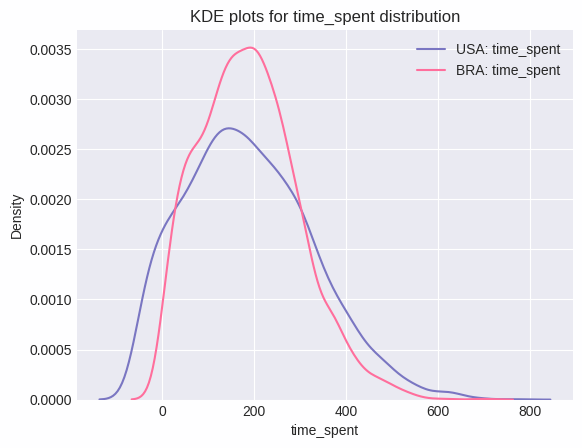

In [204]:
sns.kdeplot(df_users_USA["time_spent"] - shift, label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

–ü–æ—Å—Ç—Ä–æ–∏–≤ kdeplot, –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ —Ñ–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–æ—Ö–æ–∂–∏, –∞ —Ä–∞–∑–±—Ä–æ—Å –ø–æ –¥–∞–Ω–Ω—ã–º –°–®–ê –º–æ–∂–Ω–æ —Å–≤—è–∑–∞—Ç—å —Å –±–æ–ª—å—à–∏–º –æ–±—ä–µ–º–æ–º –≤—ã–±–æ—Ä–∫–∏. –¢–∞–∫ —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑—É 4 –º–æ–∂–Ω–æ –ø—Ä–∏–Ω—è—Ç—å (—Å–¥–µ–ª–∞–≤ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –∫–∞–∫ –¥–ª—è —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏)

### –ó–∞–¥–∞–Ω–∏–µ 3

–°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–∑ 4 –ø—É–Ω–∫—Ç–æ–≤ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –∏ –æ–±–æ—Å–Ω—É–π—Ç–µ —Ä–∞–∑–ª–∏—á–∏—è, –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∫–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –º–æ—â–Ω–µ–µ –≤ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º —Å–ª—É—á–∞–µ –∏ –ø–æ—á–µ–º—É.

#### –û—Å–Ω–æ–≤–Ω–æ–µ:
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ç–∞—Ç. —Ç–µ—Å—Ç–æ–≤ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω—ã –±—É—Ç—Å—Ç—Ä–∞–ø–æ–º.

#### –û –º–æ—â–Ω–æ—Å—Ç–∏:

**1. –ú–µ–¥–∏–∞–Ω—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ª—é–¥–µ–π –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.**

–î–ª—è –ø–µ—Ä–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è —Ç–µ—Å—Ç –£–∏–ª–∫–æ–∫—Å–æ–Ω–∞, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –≥–∏–ø–æ—Ç–µ–∑–∞ —Å—Ç—Ä–æ–∏—Ç—Å—è –∫–∞–∫ —Ä–∞–∑ –Ω–∞ —Ä–∞–∑–Ω–∏—Ü–µ –º–µ–¥–∏–∞–Ω, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, —ç—Ç–æ—Ç —Ç–µ—Å—Ç –º–æ—â–Ω–µ–µ –±—É—Ç—Å—Ç—Ä–∞–ø–∞.

**2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ –≤ 2017 –∏ 2018 –≥–æ–¥–∞—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç.**

–î–ª—è –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã —Ç–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞, —Ç. –∫. –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π, —Ç–æ –±—É–¥–µ—Ç –º–æ—â–Ω–µ–µ –±—É—Ç—Å—Ç—Ä–∞–ø–∞.

**3. –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–µ OS —É –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã.**

–î–ª—è –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã —Ç–µ—Å—Ç –•–∏-–∫–≤–∞–¥—Ä–∞—Ç, —Ç. –∫. –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π, —Ç–æ  –±—É–¥–µ—Ç –º–æ—â–Ω–µ–µ –±—É—Ç—Å—Ç—Ä–∞–ø–∞.

**4. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ª—é–¥—å–º–∏ –≤ —Å–µ—Ä–≤–∏—Å–µ, –¥–ª—è –ë—Ä–∞–∑–∏–ª–∏–∏ –∏ –°–®–ê —Å–æ–≤–ø–∞–¥–∞—é —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ —Å–º–µ—â–µ–Ω–∏—è.**

–î–ª—è –¥–∞–Ω–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è —Ç–µ—Å—Ç –£–∏–ª–∫–æ–∫—Å–æ–Ω–∞-–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –≥–∏–ø–æ—Ç–µ–∑–∞ –±—ã–ª–∞ –ø—Ä–∏–Ω—è—Ç–∞, –Ω–æ –ø—Ä–∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –ø—Ä–æ–≤–µ—Ä–∫–µ —Ç–µ—Å—Ç–æ–º –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–∞. –ë—É—Ç—Å—Ç—Ä–∞–ø –∂–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏. –ó–¥–µ—Å—å –æ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ —è –¥–∞—Ç—å –æ—Ç–≤–µ—Ç –∑–∞—Ç—Ä—É–¥–Ω—è—é—Å—å.
–¢–∞–∫–æ–µ –æ—â—É—â–µ–Ω–∏–µ, —á—Ç–æ –∑–¥–µ—Å—å –±—É–¥–µ—Ç –±–æ–ª–µ–µ –º–æ—â–µ–Ω –∑–¥—Ä–∞–≤—ã–π —Å–º—ã—Å–ª (–æ–ø–∏—Å–∞–Ω –ø–æ—Å–ª–µ —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –¥–ª—è –≥–∏–ø–æ—Ç–µ–∑—ã 4).


# –ü–∞—Å—Ö–∞–ª–∫–∞

## –ê—Å–ª–∞–Ω, —Å –Ω–∞—Å—Ç—É–ø–∞—é—â–∏–º –∏–ª–∏ —É–∂–µ –Ω–∞—Å—Ç—É–ø–∏–≤—ã—à–∏–º –Ω–æ–≤—ã–º –≥–æ–¥–æ–º!

–°–ø–∞—Å–∏–±–æ –∑–∞ –í–∞—à–∏ –ª–µ–∫—Ü–∏–∏ –∏ —Å–µ–º–µ–Ω–∞—Ä—ã! –û–¥–Ω–∏ –∏–∑ —Å–∞–º—ã—Ö –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö –∑–∞–Ω—è—Ç–∏–π, —á—Ç–æ —è –ø–æ—Å–µ—â–∞–ªüòä!

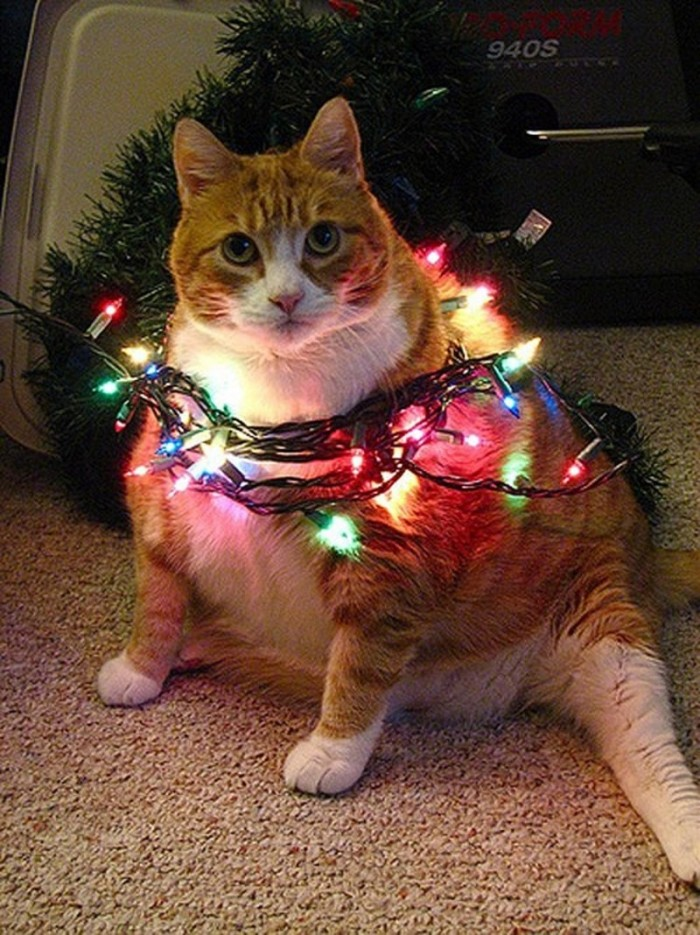

In [210]:
from IPython import display
display.Image("cat_NY.jpg")